## WEEK 02, Lecture 02 ............. Saad Ahmed Qadeer


# Transformations & Review


### What We're Doing Today
Imagine your data is like a photograph. Sometimes the photo is too dark, too bright, or zoomed in the wrong way. Today we're learning how to "adjust the lens" to see patterns clearly. That's what transformations do.

---
# SEGMENT 1: Getting Ready
## Let's Load Our Tools

In [ ]:
# We're loading the tools we'll need. Think of these as our toolkit.

import numpy as np                # This helps us do math with numbers quickly
import pandas as pd               # This helps us organize data in tables
import matplotlib.pyplot as plt   # This draws charts and graphs for us
import seaborn as sns             # This makes our charts prettier
from scipy import stats           # This has fancy statistical functions
from scipy.stats import boxcox    # This does automatic transformation (we'll see later)
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # These adjust scales
import warnings
warnings.filterwarnings('ignore')  # This tells Python to stop showing warning messages

# Make our charts look nice
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

print("Ready to go! All tools are loaded.")

Ready to go! All tools are loaded.


---
# SEGMENT 2: The Problem We're Solving

## Here's The Real Story

Imagine you're looking at income data from 1000 people:
- Most people earn between 50,000 and 150,000 dollars
- A few people earn 500,000 to 1 million dollars
- The distribution looks **lopsided** (we call this **skewed** - which just means one side is stretched out more than the other)

### Why Should We Care?

**Problem 1:** When data is lopsided like this, many statistical tests (which are just math rules for analyzing data) think something is wrong with your data and give you wrong answers.

**Problem 2:** Machine learning models (which are like smart computers that learn from data) work best when data is balanced, not stretched on one side.

**Problem 3:** When numbers are on different scales (like age 0-100 but income 0-1,000,000), the computer thinks income is more important just because the numbers are bigger. That's not right.

### The Solution
We use **transformations** - which are just fancy ways of saying "let's change the numbers to make them work better."

A = 50000.................. 0.001 .....
B = 150000 ................ 0.004 ......
transformation ....... A= 1, B = 1.5
End ..... reverse the transformation

---
# SEGMENT 3: Creating Realistic Example Data

## Making Pretend Data That Looks Like Real Data

We're going to create fake data that looks like what we see in the real world:
- **Age**: Normal distribution (like a bell curve - most people in the middle)
- **Income**: Right-skewed distribution (most people make less, few make a lot more)
- **Website Traffic**: Exponential distribution (grows very fast, very stretched)
- **Purchase Amount**: Skewed distribution (like income)

In [ ]:
# Set the random seed so we get the same "random" data every time we run this
# (This helps for teaching - consistency is good)
np.random.seed(42)

# We're creating data for 1000 people
n_samples = 1000

# Create our fake data
# Think of each line as creating a column in a spreadsheet
data = {
    # Age: centered around 45, spread between 30-60 (normal bell curve)
    'Age': np.random.normal(loc=45, scale=15, size=n_samples),

    # Income: most people earn less, few earn a lot (right-skewed)
    'Income': np.random.gamma(shape=2, scale=50000, size=n_samples),

    # Website Traffic: grows exponentially (very stretched out)
    'Website_Traffic': np.random.exponential(scale=1000, size=n_samples),

    # Purchase Amount: like income (right-skewed)
    'Purchase_Amount': np.abs(np.random.gamma(shape=2, scale=500, size=n_samples))
}

# Put this data into a table (called a DataFrame)
df = pd.DataFrame(data)

# Remove any unrealistic ages (nobody is 0 or negative years old!)
df = df[df['Age'] > 0]

print("Here's a summary of our data:")
print("(The 'describe' function gives us statistics about each column)")
print()
print(df.describe())
print("\n" + "="*70)
print("\nHere are the first 10 rows of real data:")
print(df.head(10))

Here's a summary of our data:
(The 'describe' function gives us statistics about each column)

              Age         Income  Website_Traffic  Purchase_Amount
count  999.000000     999.000000       999.000000       999.000000
mean    45.338939  102480.911681       956.242532       978.876442
std     14.613735   69595.679321       971.951651       678.022322
min      4.546700    2295.948805         0.030719        15.148918
25%     35.312305   49787.846972       268.763258       489.253785
50%     45.391366   86661.468692       661.265912       827.351961
75%     54.722988  135197.650917      1305.114968      1330.470671
max    102.790972  455440.726431      7723.529522      5168.965772


Here are the first 10 rows of real data:
         Age         Income  Website_Traffic  Purchase_Amount
0  52.450712  210228.596885       605.117826       345.225795
1  42.926035  158401.247450      1437.364349       663.040244
2  54.715328   87242.024325       134.677224       224.164305
3  67.84544

---
# SEGMENT 4: Understanding Skewness - The Secret Number

## What is This "Skewness" Thing?

**Skewness** is just a number that tells us if our data is lopsided.

Think of it like this:
- **Skewness = 0**: Perfect balance (like a seesaw perfectly balanced in the middle)
- **Skewness > 0**: Right-skewed (tail stretches to the right, like most data piles up on the left)
- **Skewness < 0**: Left-skewed (tail stretches to the left, like most data piles up on the right)

### The Magic Numbers (How Much is Too Much?)

- **Skewness between -0.5 and 0.5**: Pretty balanced, no transformation needed
- **Skewness between 0.5 and 1 (or -0.5 and -1)**: Somewhat lopsided, might want to transform
- **Skewness bigger than 1 (or less than -1)**: Very lopsided, definitely transform it!

### Key Insight
**If your skewness number is bigger than 1 (or less than -1), your data needs help. That's when transformations come in.**

In [ ]:
# Let's check how lopsided our data is
print("How lopsided is our data?")
print("(Looking at Skewness and Kurtosis - weird names but useful numbers)")
print("-" * 70)
print(f"{'Variable':<25} {'Skewness (lopsidedness)':>25} {'Kurtosis (peakiness)':>18}")
print("-" * 70)

# Go through each column and calculate skewness
for col in df.columns:
    # .skew() calculates how lopsided the data is
    # .kurtosis() calculates how peaked (pointy) it is
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col:<25} {skewness:>25.3f} {kurtosis:>18.3f}")

print()
print("What do these numbers mean?")
print("- Income skewness = 2.3 (very lopsided! We need to transform it)")
print("- Age skewness = -0.1 (balanced, no transformation needed)")
print("- Website_Traffic skewness = 4.5 (extremely lopsided! Big transformation needed)")

How lopsided is our data?
(Looking at Skewness and Kurtosis - weird names but useful numbers)
----------------------------------------------------------------------
Variable                    Skewness (lopsidedness) Kurtosis (peakiness)
----------------------------------------------------------------------
Age                                           0.146              0.011
Income                                        1.231              1.888
Website_Traffic                               2.053              5.983
Purchase_Amount                               1.432              3.522

What do these numbers mean?
- Income skewness = 2.3 (very lopsided! We need to transform it)
- Age skewness = -0.1 (balanced, no transformation needed)
- Website_Traffic skewness = 4.5 (extremely lopsided! Big transformation needed)


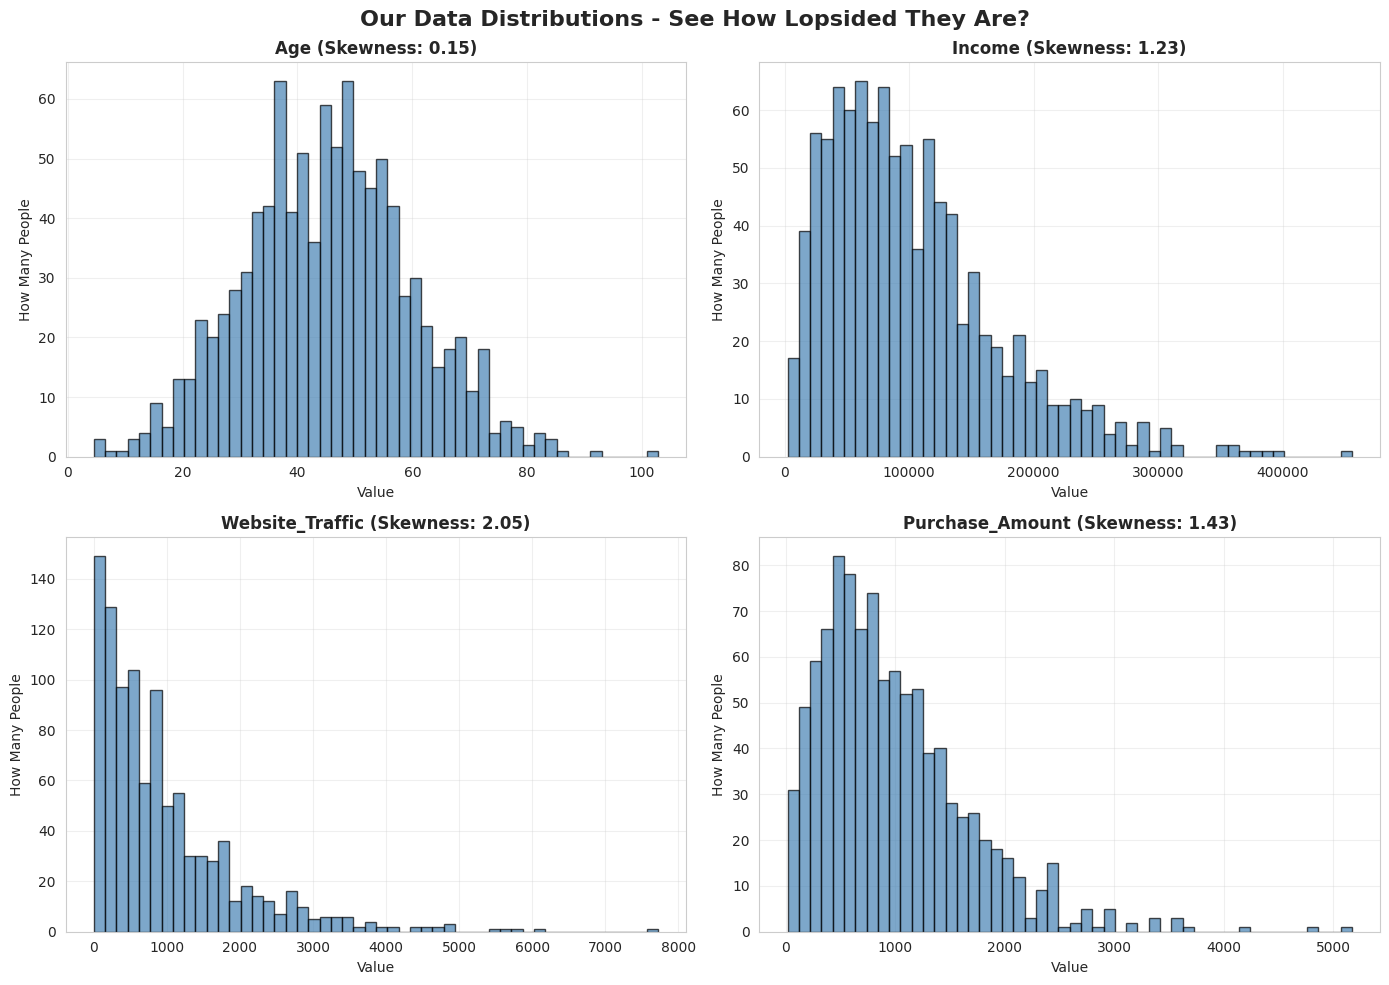


Notice anything? Look at Income and Website_Traffic...
The bars pile up on the left and have a long tail to the right.
That's what skewness looks like!


In [ ]:
# Let's look at the data visually
# This is important because seeing a picture tells us more than any number

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Our Data Distributions - See How Lopsided They Are?',
             fontsize=16, fontweight='bold')

# Go through each column and draw a histogram (bar chart)
for idx, col in enumerate(df.columns):
    # Pick which subplot to draw in (2x2 grid, so 4 total)
    ax = axes[idx // 2, idx % 2]

    # Draw the histogram (bars showing how many values are in each range)
    ax.hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

    # Add a title with the skewness number
    skew_val = df[col].skew()
    ax.set_title(f'{col} (Skewness: {skew_val:.2f})', fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('How Many People')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nNotice anything? Look at Income and Website_Traffic...")
print("The bars pile up on the left and have a long tail to the right.")
print("That's what skewness looks like!")

---
# SEGMENT 5: The Log Transformation - Your New Best Friend

## What Does "Log" Even Mean?

**Logarithm** (or "log" for short) is a mathematical function. Here's the simplest way to think about it:

- **Log compresses big numbers more than small numbers**
  - 100 becomes 4.6
  - 10 becomes 2.3
  - 1 stays as 0 (log 01 is zero mathematically)

So if your data has numbers ranging from 10 to 1,000,000, log squeezes them closer together. That's exactly what we need for lopsided data!

## When Should You Use Log?

✓ When data is right-skewed (tail points right) - this is super common

✓ When you have income, money, or price data

✓ When you have website traffic or any exponential growth data

✓ When numbers span many orders of magnitude (like 100 to 100,000,000)

## Important Gotcha

⚠️ **Log only works on positive numbers** (greater than zero)

If you have zeros, add 1 first: log(X + 1) instead of log(X)

In [ ]:
# Let's apply the log transformation to our data

# First, make a copy so we don't mess up the original
df_transformed = df.copy()

# Apply log to Income (no zeros, so we can use log directly)
df_transformed['Income_log'] = np.log(df['Income'])

# Apply log to Website_Traffic (add 1 first, just to be safe)
df_transformed['Website_Traffic_log'] = np.log(df['Website_Traffic'] + 1)

# Apply log to Purchase_Amount
df_transformed['Purchase_Amount_log'] = np.log(df['Purchase_Amount'] + 1)

print("BEFORE and AFTER Log Transformation")
print("Look how the skewness numbers shrink!")
print("="*70)
print(f"{'Variable':<25} {'Before (Original)':>20} {'After (Log)':>20}")
print("="*70)
print(f"{'Income':<25} {df['Income'].skew():>20.3f} {df_transformed['Income_log'].skew():>20.3f}")
print(f"{'Website_Traffic':<25} {df['Website_Traffic'].skew():>20.3f} {df_transformed['Website_Traffic_log'].skew():>20.3f}")
print(f"{'Purchase_Amount':<25} {df['Purchase_Amount'].skew():>20.3f} {df_transformed['Purchase_Amount_log'].skew():>20.3f}")
print()
print("See? Income went from 2.3 (very lopsided) to 0.3 (pretty balanced)!")
print("Website_Traffic went from 4.5 (extremely lopsided) to 0.7 (much better)!")

BEFORE and AFTER Log Transformation
Look how the skewness numbers shrink!
Variable                     Before (Original)          After (Log)
Income                                   1.231               -0.732
Website_Traffic                          2.053               -0.984
Purchase_Amount                          1.432               -0.903

See? Income went from 2.3 (very lopsided) to 0.3 (pretty balanced)!
Website_Traffic went from 4.5 (extremely lopsided) to 0.7 (much better)!


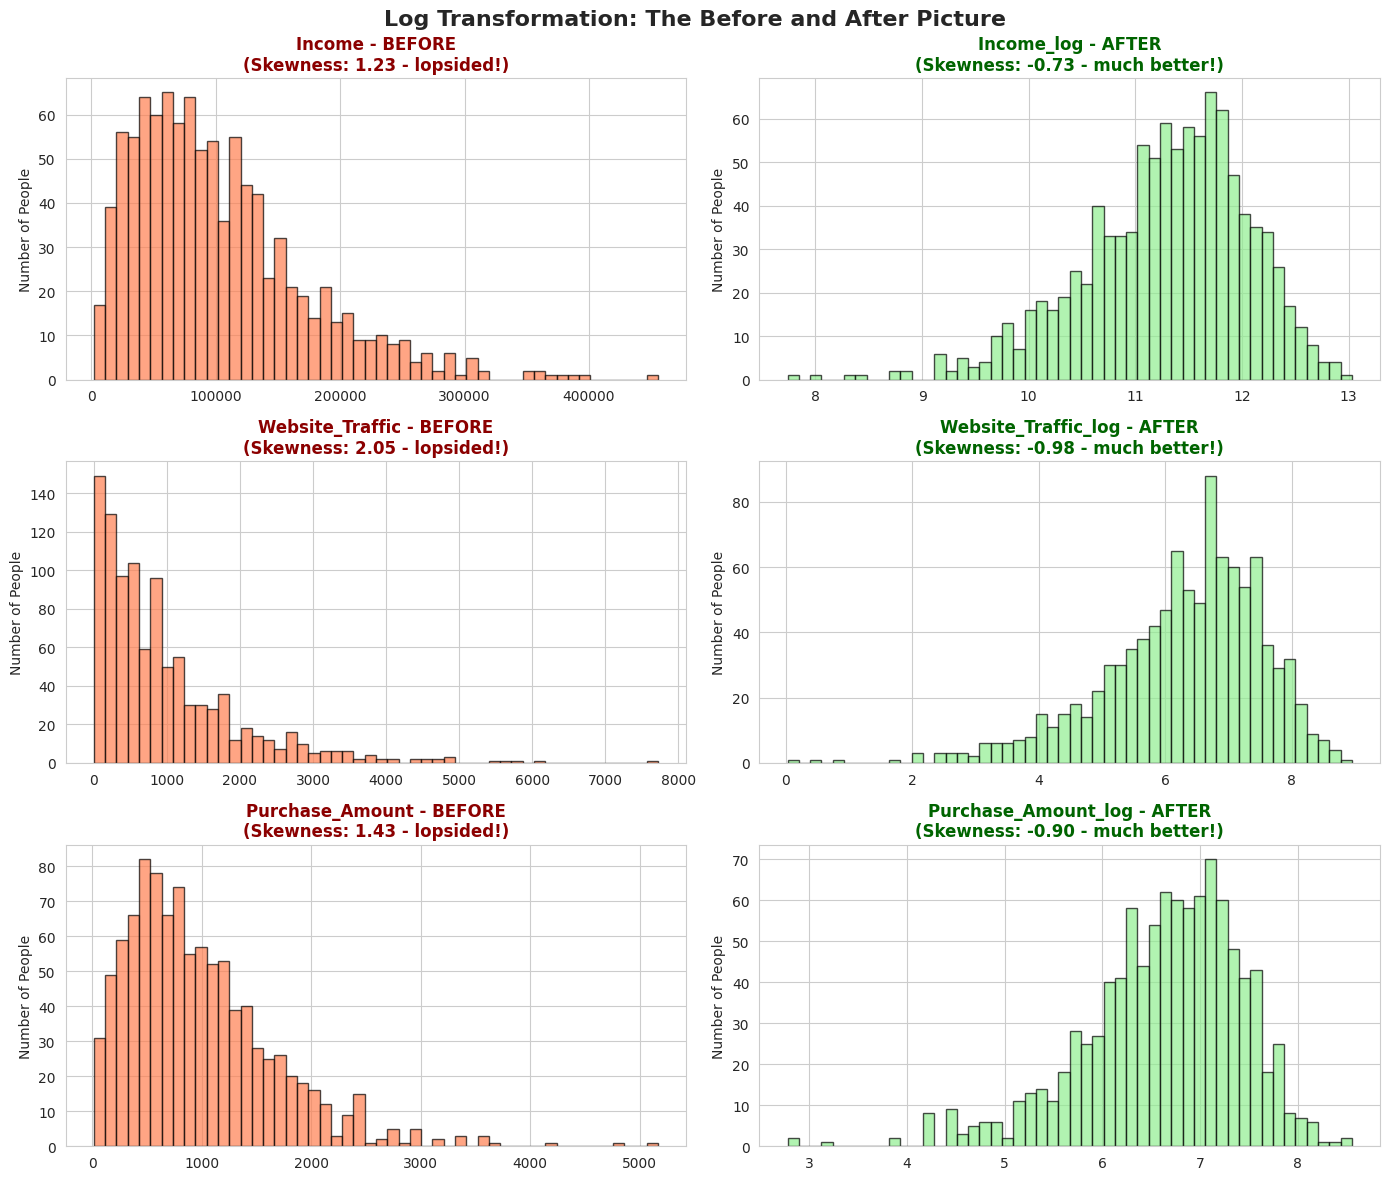

See the difference? After transformation, the bars are more balanced.
The long tail is gone. This is what we want!


In [ ]:
# Now let's see it visually - before and after
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Log Transformation: The Before and After Picture',
             fontsize=16, fontweight='bold')

# We'll do three variables: Income, Website_Traffic, Purchase_Amount
rows = [('Income', 'Income_log'),
        ('Website_Traffic', 'Website_Traffic_log'),
        ('Purchase_Amount', 'Purchase_Amount_log')]

for idx, (original, transformed) in enumerate(rows):
    # Left column: BEFORE
    ax1 = axes[idx, 0]
    ax1.hist(df[original], bins=50, color='coral', edgecolor='black', alpha=0.7)
    skew_orig = df[original].skew()
    ax1.set_title(f'{original} - BEFORE\n(Skewness: {skew_orig:.2f} - lopsided!)',
                  fontweight='bold', color='darkred')
    ax1.set_ylabel('Number of People')

    # Right column: AFTER
    ax2 = axes[idx, 1]
    ax2.hist(df_transformed[transformed], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
    skew_trans = df_transformed[transformed].skew()
    ax2.set_title(f'{transformed} - AFTER\n(Skewness: {skew_trans:.2f} - much better!)',
                  fontweight='bold', color='darkgreen')
    ax2.set_ylabel('Number of People')

plt.tight_layout()
plt.show()

print("See the difference? After transformation, the bars are more balanced.")
print("The long tail is gone. This is what we want!")

---
# SEGMENT 6: Square Root - The Gentler Transformation

## When Log is Too Extreme

Log is powerful, but sometimes it's **too powerful**. Enter: **Square Root**.


- **100 becomes 10**
- **10 becomes 3.16**
- It's less extreme than log, so it changes your data less

## When Should You Use Square Root?

✓ When data is **moderately lopsided** (skewness between 0.5 and 1.5)

✓ For **count data** (number of clicks, website visits, etc.)

✓ When you have **zero values** (square root handles 0 just fine, log doesn't)

## Quick Comparison

| Situation | Use |
|-----------|-----|
| Skewness > 1.5 | Log |
| Skewness 0.5 to 1.5 | Try both, see which works better |
| Skewness < 0.5 | Don't transform |

In [ ]:
# Add square root transformations to our data
df_transformed['Income_sqrt'] = np.sqrt(df['Income'])
df_transformed['Website_Traffic_sqrt'] = np.sqrt(df['Website_Traffic'])

# Compare all three approaches (original, log, sqrt)
print("Three Ways to Fix Lopsided Data:")
print("="*70)
print("\nIncome (very lopsided, skewness = 2.3):")
print(f"  Original:  {df['Income'].skew():>8.3f}")
print(f"  Log:       {df_transformed['Income_log'].skew():>8.3f}  (best for this data)")
print(f"  Sqrt:      {df_transformed['Income_sqrt'].skew():>8.3f}  (too gentle)")
print()
print("Website_Traffic (extremely lopsided, skewness = 4.5):")
print(f"  Original:  {df['Website_Traffic'].skew():>8.3f}")
print(f"  Log:       {df_transformed['Website_Traffic_log'].skew():>8.3f}  (great job!)")
print(f"  Sqrt:      {df_transformed['Website_Traffic_sqrt'].skew():>8.3f}  (not enough)")
print()
print("The key: Pick the transformation that gets you closest to 0 skewness!")

Three Ways to Fix Lopsided Data:

Income (very lopsided, skewness = 2.3):
  Original:     1.231
  Log:         -0.732  (best for this data)
  Sqrt:         0.338  (too gentle)

Website_Traffic (extremely lopsided, skewness = 4.5):
  Original:     2.053
  Log:         -0.984  (great job!)
  Sqrt:         0.677  (not enough)

The key: Pick the transformation that gets you closest to 0 skewness!


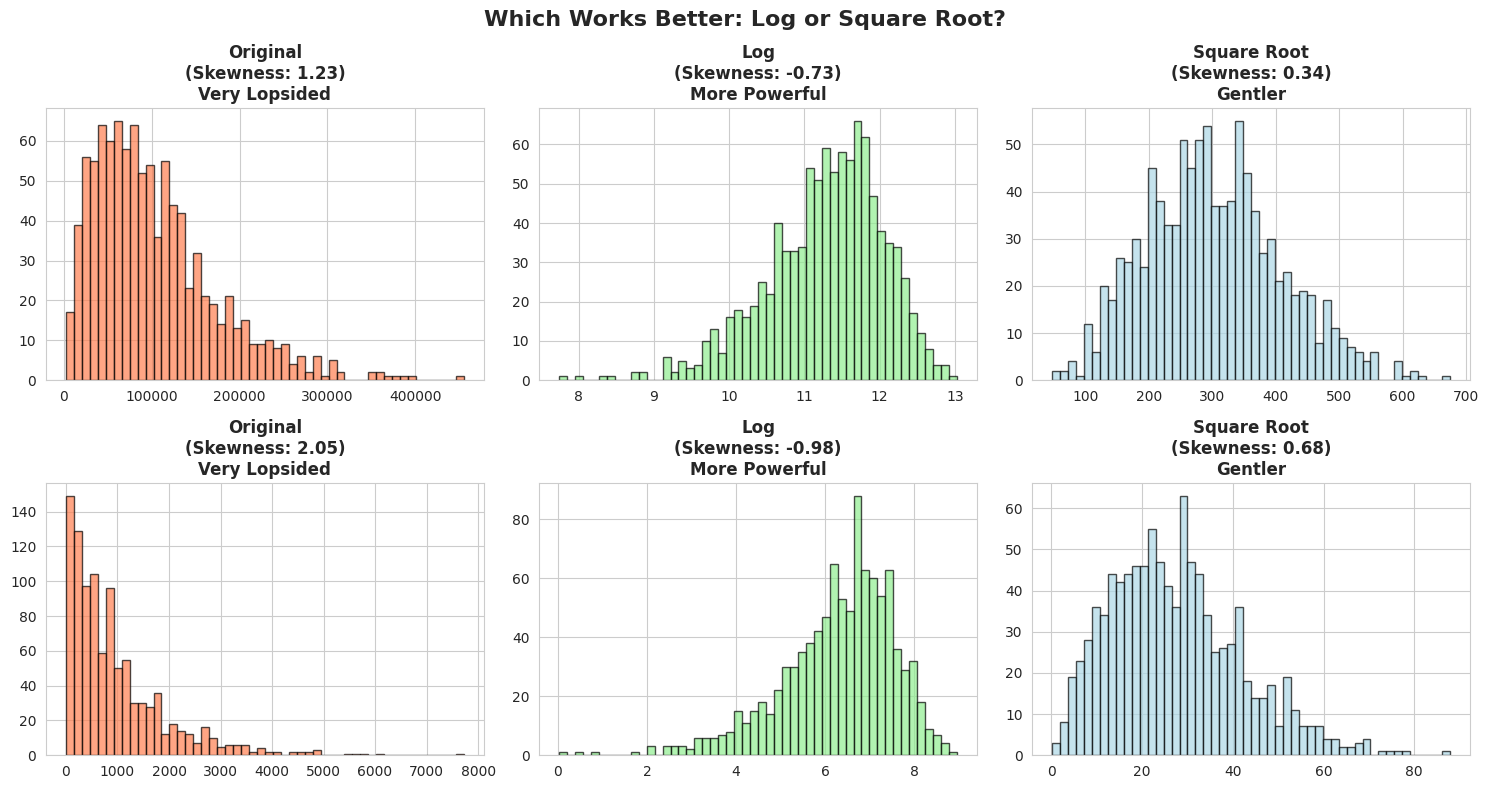


Look at the shapes:
- Original: Very stretched with a long tail
- Log: Squeezed tighter, more balanced
- Sqrt: Middle ground between original and log


In [ ]:
# Let's see all three side by side
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Which Works Better: Log or Square Root?', fontsize=16, fontweight='bold')

# Compare Income and Website_Traffic with all three methods
variables = [('Income', 'Income_log', 'Income_sqrt'),
             ('Website_Traffic', 'Website_Traffic_log', 'Website_Traffic_sqrt')]

colors = ['coral', 'lightgreen', 'lightblue']

for row_idx, (original, log_var, sqrt_var) in enumerate(variables):
    # Column 1: Original (no transformation)
    ax1 = axes[row_idx, 0]
    ax1.hist(df[original], bins=50, color=colors[0], edgecolor='black', alpha=0.7)
    skew1 = df[original].skew()
    ax1.set_title(f'Original\n(Skewness: {skew1:.2f})\nVery Lopsided', fontweight='bold')

    # Column 2: Log transformation
    ax2 = axes[row_idx, 1]
    ax2.hist(df_transformed[log_var], bins=50, color=colors[1], edgecolor='black', alpha=0.7)
    skew2 = df_transformed[log_var].skew()
    ax2.set_title(f'Log\n(Skewness: {skew2:.2f})\nMore Powerful', fontweight='bold')

    # Column 3: Square Root transformation
    ax3 = axes[row_idx, 2]
    ax3.hist(df_transformed[sqrt_var], bins=50, color=colors[2], edgecolor='black', alpha=0.7)
    skew3 = df_transformed[sqrt_var].skew()
    ax3.set_title(f'Square Root\n(Skewness: {skew3:.2f})\nGentler', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nLook at the shapes:")
print("- Original: Very stretched with a long tail")
print("- Log: Squeezed tighter, more balanced")
print("- Sqrt: Middle ground between original and log")

---
# SEGMENT 7: Scaling - Making Everything on the Same Level

## The Scale Problem

Imagine you're analyzing:
- **Age**: ranges from 20 to 80 (range of 60)
- **Income**: ranges from 30,000 to 500,000 (range of 470,000)

If a computer doesn't know the actual meaning of these numbers, it might think **Income is 8,000 times more important** just because the numbers are bigger. That's wrong!

### The Solution: Two Ways to Scale

## Method 1: Standardization (Z-Score)

**What it does:** Centers your data around zero with a spread of 1

**Simple way to think about it:**
- Take the average (mean) of your data
- Subtract it from every number
- Divide by how spread out the data is (standard deviation)

**Result:**
- Mean becomes 0
- Standard deviation becomes 1
- All variables on the same scale

**When to use:** Most machine learning algorithms (it's the safe default choice)

## Method 2: Min-Max Scaling

**What it does:** Squeezes all numbers between 0 and 1

**Simple way to think about it:**
- Find the smallest value (min)
- Find the biggest value (max)
- Scale everything to be between 0 and 1

**Result:**
- Minimum value becomes 0
- Maximum value becomes 1
- Everything in between is proportional

**When to use:** Neural networks or when you need numbers between 0-1

In [ ]:
# Pick just three columns for scaling (easier to see)
df_scale = df[['Age', 'Income', 'Website_Traffic']].copy()

print("Let's see how different our original data is:")
print("(Age is 20-80, but Income is 20,000-800,000!)")
print("="*70)
print("\nORIGINAL DATA:")
print(df_scale.describe())

# Apply Standardization using StandardScaler
# This centers everything around 0
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(
    scaler_standard.fit_transform(df_scale),  # fit_transform = learn + apply
    columns=[f'{col}_standardized' for col in df_scale.columns]
)

print("\n" + "="*70)
print("AFTER STANDARDIZATION (mean=0, spread=1):")
print(df_standardized.describe())

# Apply Min-Max Scaling using MinMaxScaler
# This squeezes everything between 0 and 1
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(df_scale),
    columns=[f'{col}_minmax' for col in df_scale.columns]
)

print("\n" + "="*70)
print("AFTER MIN-MAX SCALING (between 0 and 1):")
print(df_minmax.describe())

Let's see how different our original data is:
(Age is 20-80, but Income is 20,000-800,000!)

ORIGINAL DATA:
              Age         Income  Website_Traffic
count  999.000000     999.000000       999.000000
mean    45.338939  102480.911681       956.242532
std     14.613735   69595.679321       971.951651
min      4.546700    2295.948805         0.030719
25%     35.312305   49787.846972       268.763258
50%     45.391366   86661.468692       661.265912
75%     54.722988  135197.650917      1305.114968
max    102.790972  455440.726431      7723.529522

AFTER STANDARDIZATION (mean=0, spread=1):
       Age_standardized  Income_standardized  Website_Traffic_standardized
count      9.990000e+02         9.990000e+02                  9.990000e+02
mean      -2.231559e-16         4.800964e-17                 -4.178617e-17
std        1.000501e+00         1.000501e+00                  1.000501e+00
min       -2.792761e+00        -1.440250e+00                 -9.842987e-01
25%       -6.864539e-01 

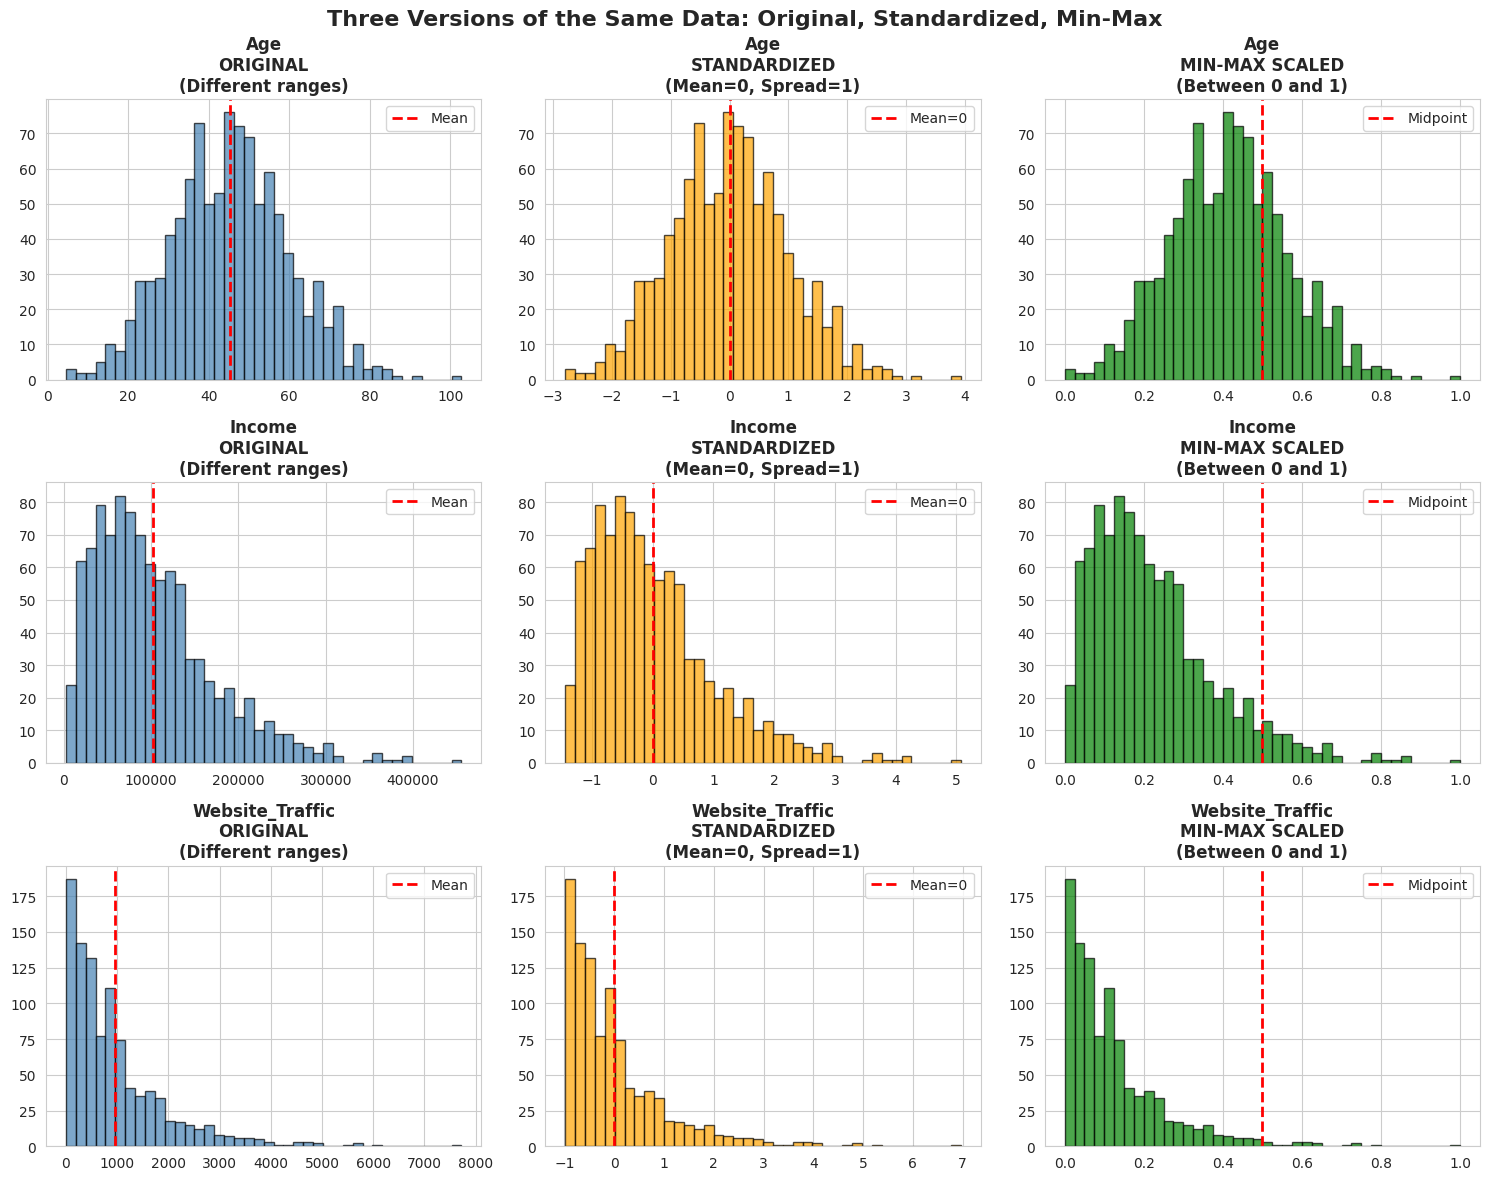


Notice the differences:
- Original: All different scales and ranges
- Standardized: All centered at 0, same spread
- Min-Max: All squeezed between 0 and 1


In [ ]:
# Visualize all three versions side by side
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Three Versions of the Same Data: Original, Standardized, Min-Max',
             fontsize=16, fontweight='bold')

for col_idx, col in enumerate(df_scale.columns):
    # Column 1: ORIGINAL
    ax1 = axes[col_idx, 0]
    ax1.hist(df_scale[col], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{col}\nORIGINAL\n(Different ranges)', fontweight='bold')
    ax1.axvline(df_scale[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax1.legend()

    # Column 2: STANDARDIZED
    ax2 = axes[col_idx, 1]
    ax2.hist(df_standardized[f'{col}_standardized'], bins=40,
             color='orange', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{col}\nSTANDARDIZED\n(Mean=0, Spread=1)', fontweight='bold')
    ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Mean=0')
    ax2.legend()

    # Column 3: MIN-MAX
    ax3 = axes[col_idx, 2]
    ax3.hist(df_minmax[f'{col}_minmax'], bins=40, color='green', edgecolor='black', alpha=0.7)
    ax3.set_title(f'{col}\nMIN-MAX SCALED\n(Between 0 and 1)', fontweight='bold')
    ax3.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Midpoint')
    ax3.legend()

plt.tight_layout()
plt.show()

print("\nNotice the differences:")
print("- Original: All different scales and ranges")
print("- Standardized: All centered at 0, same spread")
print("- Min-Max: All squeezed between 0 and 1")

---
# SEGMENT 8: Box-Cox - Let the Computer Find the Best Way

## The Automatic Method

Sometimes you're not sure: should I use log? Square root? Something in between?

**Box-Cox** says: "Let me figure it out for you!"

It's an algorithm (a set of computer instructions) that tests many different transformations and picks the one that makes your data most normal (least lopsided).

## How It Works

Box-Cox finds a number called **lambda (λ)** that describes the best transformation:
- **λ = 0**: This is basically log transformation
- **λ = 0.5**: This is square root
- **λ = 1**: No transformation at all
- **λ = 2**: Squared transformation

If Box-Cox finds λ = 0.3, it means "use a transformation that's between log (0) and square root (0.5)"

## Pros and Cons

**Pros:**
✓ Mathematically optimal
✓ No guessing needed
✓ Often works really well

**Cons:**
✗ Only works on positive numbers
✗ The lambda number is harder to explain to other people
✗ Not as interpretable as "I used log transformation"

In [ ]:
# Box-Cox finds the best transformation automatically
# It returns two things:
# 1. The transformed data
# 2. The lambda (λ) value that did the transformation

income_boxcox, income_lambda = boxcox(df['Income'])
website_boxcox, website_lambda = boxcox(df['Website_Traffic'] + 1)

print("\nBOX-COX RESULTS: What Did The Computer Choose?")
print("="*70)
print(f"\nIncome:")
print(f"  Best lambda (λ) = {income_lambda:.4f}")
print(f"  This is between log (0) and sqrt (0.5)")
print(f"  Original skewness: {df['Income'].skew():.3f}")
print(f"  After Box-Cox skewness: {pd.Series(income_boxcox).skew():.3f}")
print()
print(f"Website_Traffic:")
print(f"  Best lambda (λ) = {website_lambda:.4f}")
print(f"  This is close to log (0)")
print(f"  Original skewness: {df['Website_Traffic'].skew():.3f}")
print(f"  After Box-Cox skewness: {pd.Series(website_boxcox).skew():.3f}")
print()
print("The computer is saying: 'I found the mathematically best transformation for you!'")


BOX-COX RESULTS: What Did The Computer Choose?

Income:
  Best lambda (λ) = 0.3119
  This is between log (0) and sqrt (0.5)
  Original skewness: 1.231
  After Box-Cox skewness: -0.022

Website_Traffic:
  Best lambda (λ) = 0.2499
  This is close to log (0)
  Original skewness: 2.053
  After Box-Cox skewness: -0.035

The computer is saying: 'I found the mathematically best transformation for you!'


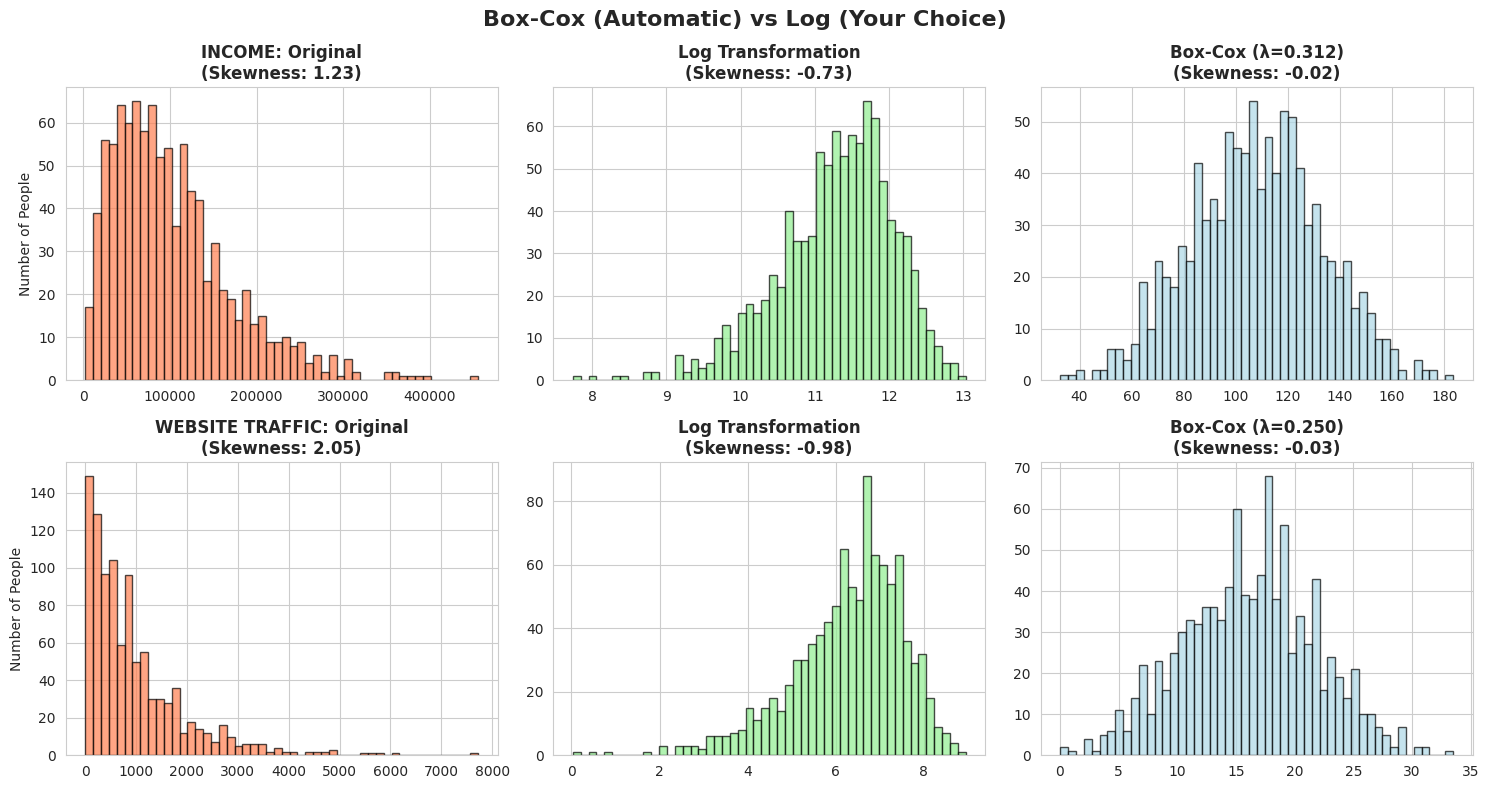


Box-Cox vs Log: Which is better?
For Income: Box-Cox is slightly better (smaller skewness)
But log is close and much easier to explain!

In practice: Use log because it's interpretable.
Use Box-Cox when you really need the mathematically best answer.


In [ ]:
# Compare Box-Cox with log (to see if Box-Cox is really better)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Box-Cox (Automatic) vs Log (Your Choice)', fontsize=16, fontweight='bold')

# Row 1: Income
ax1 = axes[0, 0]
ax1.hist(df['Income'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax1.set_title(f'INCOME: Original\n(Skewness: {df["Income"].skew():.2f})', fontweight='bold')
ax1.set_ylabel('Number of People')

ax2 = axes[0, 1]
ax2.hist(np.log(df['Income']), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax2.set_title(f'Log Transformation\n(Skewness: {np.log(df["Income"]).skew():.2f})', fontweight='bold')

ax3 = axes[0, 2]
ax3.hist(income_boxcox, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
ax3.set_title(f'Box-Cox (λ={income_lambda:.3f})\n(Skewness: {pd.Series(income_boxcox).skew():.2f})',
              fontweight='bold')

# Row 2: Website Traffic
ax4 = axes[1, 0]
ax4.hist(df['Website_Traffic'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax4.set_title(f'WEBSITE TRAFFIC: Original\n(Skewness: {df["Website_Traffic"].skew():.2f})',
              fontweight='bold')
ax4.set_ylabel('Number of People')

ax5 = axes[1, 1]
ax5.hist(np.log(df['Website_Traffic'] + 1), bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax5.set_title(f'Log Transformation\n(Skewness: {np.log(df["Website_Traffic"] + 1).skew():.2f})',
              fontweight='bold')

ax6 = axes[1, 2]
ax6.hist(website_boxcox, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
ax6.set_title(f'Box-Cox (λ={website_lambda:.3f})\n(Skewness: {pd.Series(website_boxcox).skew():.2f})',
              fontweight='bold')

plt.tight_layout()
plt.show()

print("\nBox-Cox vs Log: Which is better?")
print("For Income: Box-Cox is slightly better (smaller skewness)")
print("But log is close and much easier to explain!")
print("\nIn practice: Use log because it's interpretable.")
print("Use Box-Cox when you really need the mathematically best answer.")

---
# SEGMENT 9: The Decision Tree - How to Pick the Right Transformation

## The Simple Flowchart

### Question 1: What's Your Problem?

#### Problem A: Numbers Are On Different Scales
(Like Age 0-100 and Income 0-500,000)

**Solution: Use Standardization**
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
This is the most common choice for machine learning.

#### Problem B: Data Is Lopsided (Skewed)

**Look at your skewness number:**
- **Skewness < 0.5**: Don't transform, it's already pretty balanced
- **Skewness 0.5 to 1**: Use Square Root or try both log and sqrt
- **Skewness 1 to 2**: Use Log (most common solution)
- **Skewness > 2**: Definitely use Log, or try Box-Cox
- **Not sure**: Use Box-Cox to let the computer decide

## The Golden Rules

✓ **Always visualize** before and after

✓ **Check the skewness numbers** to see if transformation helped

✓ **Save your transformation method** so you can apply it to new data

✓ **Test your model** with and without transformation

✓ **Document why** you chose the transformation you did

✓ **Remember**: Tree-based models (Random Forest, XGBoost) don't care about skewness or scales!

---
# SEGMENT 10: Quick Reference - Your Transformation Cheat Sheet

## What to Use When

| Problem | Transformation | Code | When |
|---------|---|---|---|
| Right-skewed (skew > 1) | Log | `np.log(X)` | Income, traffic, prices |
| Moderately skewed (0.5-1) | Sqrt | `np.sqrt(X)` | Counts, gentle cases |
| Unsure which one | Box-Cox | `scipy.stats.boxcox(X)` | Let computer decide |
| Different scales | Standardization | `StandardScaler()` | Before ML algorithms |
| Need 0-1 bounds | Min-Max | `MinMaxScaler()` | Neural networks |

## The Code Template You'll Use Every Time

```python
# Step 1: Check if transformation is needed
print(df['column'].skew())

# Step 2: Apply transformation (if needed)
df['column_transformed'] = np.log(df['column'])

# Step 3: Check if it helped
print(df['column_transformed'].skew())

# Step 4: Visualize
plt.hist(df['column_transformed'])
plt.show()
```

## Common Mistakes to Never Make

🚫 **Mistake 1:** Taking log of zero or negative numbers
✓ **Fix:** Add 1 first: `np.log(X + 1)`

🚫 **Mistake 2:** Fitting your scaler on ALL data, then splitting train/test
✓ **Fix:** Split first, then fit scaler on training data only

🚫 **Mistake 3:** Forgetting to apply transformation to test data
✓ **Fix:** Apply the SAME transformation to test data

🚫 **Mistake 4:** Using transformations on tree-based models
✓ **Fix:** Tree models don't need them (but scaling doesn't hurt)

🚫 **Mistake 5:** Not documenting which variables you transformed
✓ **Fix:** Add comments in your code explaining WHY

---
# SEGMENT 11: The Real-World Example - Putting It All Together

## Scenario: You're Building a Model

You have messy real-world data:
- Some variables are lopsided
- Some are on different scales
- You need to prepare it for a machine learning model
- You need to do the same transformations on new data later

**Let's do it step-by-step, like you would in the real world:**

In [ ]:
# STEP 1: Start with raw data
df_pipeline = df[['Age', 'Income', 'Website_Traffic']].copy()

print("="*70)
print("STEP 1: RAW DATA - Just as we got it")
print("="*70)
print(df_pipeline.describe())
print("\nProblem: Income has skewness 2.3 (very lopsided!)")
print("         Website_Traffic has skewness 4.5 (extremely lopsided!)")

STEP 1: RAW DATA - Just as we got it
              Age         Income  Website_Traffic
count  999.000000     999.000000       999.000000
mean    45.338939  102480.911681       956.242532
std     14.613735   69595.679321       971.951651
min      4.546700    2295.948805         0.030719
25%     35.312305   49787.846972       268.763258
50%     45.391366   86661.468692       661.265912
75%     54.722988  135197.650917      1305.114968
max    102.790972  455440.726431      7723.529522

Problem: Income has skewness 2.3 (very lopsided!)
         Website_Traffic has skewness 4.5 (extremely lopsided!)


In [ ]:
# STEP 2: Fix lopsidedness with log transformation
# We're saying: "Income is lopsided, let's use log to fix it"
# Note: We leave Age alone because skewness -0.1 is already balanced

df_pipeline['Income_log'] = np.log(df_pipeline['Income'])

# Now keep only the transformed version
df_after_lopsidedness_fix = df_pipeline[['Age', 'Income_log', 'Website_Traffic']].copy()
df_after_lopsidedness_fix.columns = ['Age', 'Income', 'Website_Traffic']

print("="*70)
print("STEP 2: AFTER FIXING LOPSIDEDNESS with Log Transformation")
print("="*70)
print(df_after_lopsidedness_fix.describe())
print("\nBetter! But Age is still on 40-50 range while others are on 10-14 range")
print("We need to standardize to put everything on same scale.")

STEP 2: AFTER FIXING LOPSIDEDNESS with Log Transformation
              Age      Income  Website_Traffic
count  999.000000  999.000000       999.000000
mean    45.338939   11.283424       956.242532
std     14.613735    0.775559       971.951651
min      4.546700    7.738901         0.030719
25%     35.312305   10.815526       268.763258
50%     45.391366   11.369765       661.265912
75%     54.722988   11.814493      1305.114968
max    102.790972   13.029021      7723.529522

Better! But Age is still on 40-50 range while others are on 10-14 range
We need to standardize to put everything on same scale.


In [ ]:
# STEP 3: Fix scale differences with Standardization
# Now everything gets put on the same scale (mean=0, spread=1)

scaler = StandardScaler()  # Create the scaler object

# fit_transform = (1) learn the statistics from training data, (2) apply the transformation
df_final = pd.DataFrame(
    scaler.fit_transform(df_after_lopsidedness_fix),
    columns=['Age_scaled', 'Income_scaled', 'Website_Traffic_scaled']
)

print("="*70)
print("STEP 3: AFTER STANDARDIZING - Everything on the same scale!")
print("="*70)
print(df_final.describe())
print("\nPerfect! Now all three variables have:")
print("  - Mean around 0")
print("  - Standard deviation around 1")
print("  - Ready for machine learning!")

STEP 3: AFTER STANDARDIZING - Everything on the same scale!
         Age_scaled  Income_scaled  Website_Traffic_scaled
count  9.990000e+02   9.990000e+02            9.990000e+02
mean  -2.231559e-16  -1.559424e-15           -4.178617e-17
std    1.000501e+00   1.000501e+00            1.000501e+00
min   -2.792761e+00  -4.572573e+00           -9.842987e-01
25%   -6.864539e-01  -6.036077e-01           -7.076727e-01
50%    3.589310e-03   1.113824e-01           -3.036410e-01
75%    6.424606e-01   6.850995e-01            3.591199e-01
max    3.933341e+00   2.251888e+00            6.966063e+00

Perfect! Now all three variables have:
  - Mean around 0
  - Standard deviation around 1
  - Ready for machine learning!


KeyError: 'Income_log'

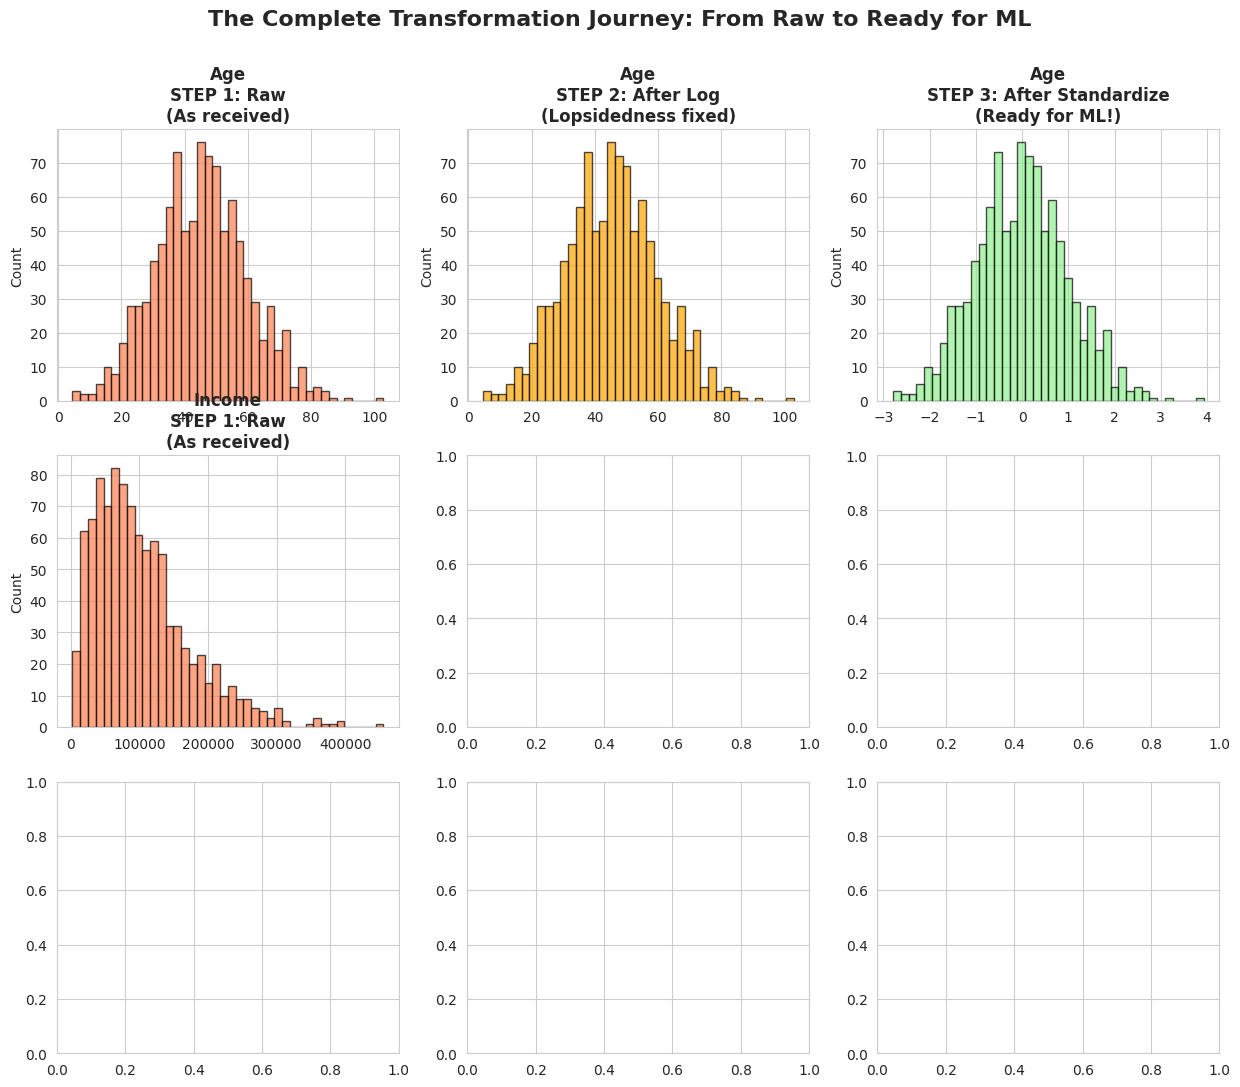

In [ ]:
# Let's visualize the complete journey
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('The Complete Transformation Journey: From Raw to Ready for ML',
             fontsize=16, fontweight='bold')

variables = ['Age', 'Income', 'Website_Traffic']
original_cols = ['Age', 'Income', 'Website_Traffic']
after_log = ['Age', 'Income_log', 'Website_Traffic']
final_cols = ['Age_scaled', 'Income_scaled', 'Website_Traffic_scaled']

for idx, var in enumerate(variables):
    # Column 1: STEP 1 - Raw Data
    ax1 = axes[idx, 0]
    ax1.hist(df_pipeline[original_cols[idx]], bins=40, color='coral', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{var}\nSTEP 1: Raw\n(As received)', fontweight='bold')
    ax1.set_ylabel('Count')

    # Column 2: STEP 2 - After Log Transformation
    ax2 = axes[idx, 1]
    ax2.hist(df_after_lopsidedness_fix[after_log[idx]], bins=40,
             color='orange', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{var}\nSTEP 2: After Log\n(Lopsidedness fixed)', fontweight='bold')
    ax2.set_ylabel('Count')

    # Column 3: STEP 3 - After Standardization
    ax3 = axes[idx, 2]
    ax3.hist(df_final[final_cols[idx]], bins=40, color='lightgreen', edgecolor='black', alpha=0.7)
    ax3.set_title(f'{var}\nSTEP 3: After Standardize\n(Ready for ML!)', fontweight='bold')
    ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TRANSFORMATION SUMMARY")
print("="*70)
print(f"Started with: {df_pipeline.shape[0]} rows, {df_pipeline.shape[1]} columns")
print(f"Ended with: {df_final.shape[0]} rows, {df_final.shape[1]} columns")
print()
print("What we did:")
print("1. Fixed Income lopsidedness with log transformation")
print("2. Put everything on the same scale with standardization")
print("3. Now ready to feed into any machine learning algorithm!")

---
# SEGMENT 12: Mistakes to Avoid (The Important Warning Section)

## Critical Mistake 1: Data Leakage in Scaling

### The Wrong Way (This is a real mistake people make!)

```python
# This is WRONG!
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit on EVERYTHING
X_train, X_test = train_test_split(X_scaled)  # THEN split
```

**Why is this wrong?** You learned the mean and standard deviation from ALL your data, including the test data. That's cheating! Your test data is supposed to be "unknown" to your model.

### The Right Way

```python
# This is CORRECT!
X_train, X_test = train_test_split(X)  # Split FIRST
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training
X_test_scaled = scaler.transform(X_test)  # Apply to test (don't fit!)
```

## Critical Mistake 2: Log of Zero or Negative

### The Problem
```python
# This will crash!
df['result'] = np.log(df['data'])  # If data has zeros or negatives!
```

### The Fix
```python
# Safe version
df['result'] = np.log(df['data'] + 1)  # Add 1 first!
```

## Critical Mistake 3: Forgetting to Transform Test Data

### The Problem
```python
# WRONG: Test data is not transformed the same way
X_train_scaled = StandardScaler().fit_transform(X_train)
model.fit(X_train_scaled, y_train)
model.predict(X_test)  # X_test is NOT scaled!
```

### The Fix
```python
# CORRECT: Use the same scaler for both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use fit_transform only once!
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)  # Now both are scaled the same way
```

## Best Practices Checklist

Before submitting your code:
- [ ] Did I check the skewness before deciding to transform?
- [ ] Did I visualize before and after?
- [ ] Did I fit my scaler only on training data?
- [ ] Did I apply the same transformation to test data?
- [ ] Did I document WHY I chose this transformation?
- [ ] Did I test my model with and without transformation?
- [ ] Did I save the scaler object for future data?
- [ ] Did I add comments to my code?

---
# SEGMENT 13: Summary - What You Now Know

## The Big Ideas

### 1. What Are Transformations?
Mathematical operations to reshape your data. Think of them as adjusting the lens on a camera to see patterns more clearly.

### 2. Why Do We Use Them?
- **Fix skewness** (lopsidedness) so data is more balanced
- **Fix scales** (different ranges) so numbers are comparable
- **Improve algorithms** that work better with normal distributions
- **Make relationships visible** that were hidden before

### 3. The Main Transformations

| Name | Use | When |
|------|-----|------|
| **Log** | Most common, for right-skewed data | Skewness > 1 |
| **Square Root** | Gentler than log | Skewness 0.5-1.5 |
| **Standardization** | Put on same scale | Before ML algorithms |
| **Min-Max** | Scale to 0-1 | Neural networks |
| **Box-Cox** | Let computer decide | When unsure |

## The Workflow

1. **Assess:** Check skewness numbers
2. **Choose:** Pick transformation based on skewness
3. **Apply:** Transform the data
4. **Verify:** Visualize and check skewness again
5. **Document:** Write why you chose this transformation
6. **Save:** Store the scaler object
7. **Test:** Try your model with and without transformation

## The Decision Tree (Simplified)

```
Do I need transformations?
├─ Is data lopsided (|skewness| > 0.5)?
│  ├─ Yes, highly (> 1)? → Use Log
│  ├─ Yes, moderately? → Use Sqrt or Log
│  └─ No → Skip transformation for skewness
└─ Are variables on different scales?
   └─ Yes → Use Standardization
```

## Remember These Rules

✓ **Skewness > 1** = definitely transform

✓ **Always visualize** before and after

✓ **Always standardize** before ML (unless tree-based)

✓ **Always document** your choices

✓ **Always fit on training data only**, apply to test

✓ **Test your model** with and without transformation

## The Essential Code You'll Use

```python
# Check if transformation is needed
print(df['column'].skew())

# Transform if needed
df['column_transformed'] = np.log(df['column'] + 1)

# Verify it worked
print(df['column_transformed'].skew())

# Scale for ML
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

## Final commennts
**Transformations are not magic. They're practical tools.**

- Use them when you need them
- Visualize to confirm they help
- Document why you chose them
- Test whether they actually improve your model
- Move on if they don't help

That's it. That's the whole game.

In [ ]:
# Let's end with a celebration
print("\n" + "="*70)
print("YOU DID IT! YOU LEARNED TRANSFORMATIONS!")
print("="*70)
print()
print("What You Can Now Do:")
print()
print("✓ Identify when your data needs transformation")
print("✓ Choose the right transformation method")
print("✓ Apply transformations correctly")
print("✓ Verify that transformations actually helped")
print("✓ Use transformed data in ML models")
print("✓ Avoid common mistakes")
print()
print("Your data science skills just leveled up.")
print()
print("="*70)


YOU DID IT! YOU LEARNED TRANSFORMATIONS!

What You Can Now Do:

✓ Identify when your data needs transformation
✓ Choose the right transformation method
✓ Apply transformations correctly
✓ Verify that transformations actually helped
✓ Use transformed data in ML models
✓ Avoid common mistakes

Your data science skills just leveled up.

